In [16]:
import pandas as pd
dataset_sample=pd.read_csv("shopee_sample_data.csv")
dataset_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42425 entries, 0 to 42424
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_ori             42267 non-null  float64
 1   delivery              42363 non-null  object 
 2   item_category_detail  42363 non-null  object 
 3   specification         42363 non-null  object 
 4   title                 42363 non-null  object 
 5   w_date                42363 non-null  float64
 6   link_ori              42363 non-null  object 
 7   item_rating           38623 non-null  float64
 8   seller_name           42363 non-null  object 
 9   idElastic             42363 non-null  object 
 10  price_actual          42335 non-null  float64
 11  sitename              42363 non-null  object 
 12  idHash                42363 non-null  object 
 13  seller_details        41671 non-null  object 
 14  location              33756 non-null  object 
 15  total_rating       

In [17]:
def isfloat(value):
    try:
        float(value)  # Try to convert the value to float
        return True   # If successful, it's a float
    except ValueError:  # If it fails, it's not a float
        return False
dataset_sample.iloc[dataset_sample[dataset_sample['item_category_detail'].apply(lambda x: isfloat(x)) == True].index]
dataset_sample.dropna(thresh=10,inplace=True,axis=0)
dataset_sample['item_category_detail'] = dataset_sample['item_category_detail'].apply(lambda x: x.lower())
dataset_sample['item_category_detail'] = dataset_sample['item_category_detail'].apply(lambda x: x.split('|'))
dataset_sample['item_category_detail'] = dataset_sample['item_category_detail'].apply(lambda x: [st.strip() for st in x])


In [18]:
dataset_sample['Type of product']=dataset_sample["item_category_detail"].apply(lambda x: x[1])
dataset_sample['Type of product_2']=dataset_sample["item_category_detail"].apply(lambda x : x[2] if len(x)>3 else x[1])
dataset_sample.loc[:,['Type of product','Type of product_2']]


,Type of product,Type of product_2
0,women's clothing,women's clothing
1,women's clothing,dresses
2,women's clothing,dresses
3,women's clothing,dresses
4,women's clothing,dresses
...,...,...
42420,women's clothing,traditional wear
42421,women's clothing,women's clothing
42422,mobile & gadgets,cases & covers
42423,mobile & gadgets,cases & covers


In [19]:
import pprint
pd.reset_option('display.max_colwidth')
dataset_sample[dataset_sample['Type of product']=='baby & toys']['Type of product_2'].unique()


array(['baby clothing', 'baby gear', 'feeding & nursing',
       'bath & toiletries', 'formula & food', 'boys fashion',
       'toys & education', 'nursery', 'girls fashion',
       'diapers & potties', 'kids fashion accessories & bags',
       'baby & toys', 'baby & toddler play', 'kids sports & outdoor play',
       'kids health & skincare', 'baby safety', 'maternity care'],
      dtype=object)

In [20]:
fashion_names=["women's clothing", "men's clothing", 'muslim fashion',
               'baby & toys', 'watches',
               "men's bags & wallets",
               "women's bags", 'sports & outdoor', 'fashion accessories'
               , "men's shoes", "women's shoes", 'women clothes']
fashion_names_2=['baby clothing', 'boys fashion', 'girls fashion', 'kids fashion accessories & bags']



In [21]:
new_set=dataset_sample[(dataset_sample['Type of product'].isin(fashion_names)) | (dataset_sample['Type of product_2'].isin(fashion_names_2))]

In [22]:
print(new_set.columns)
new_set

Index(['price_ori', 'delivery', 'item_category_detail', 'specification',
       'title', 'w_date', 'link_ori', 'item_rating', 'seller_name',
       'idElastic', 'price_actual', 'sitename', 'idHash', 'seller_details',
       'location', 'total_rating', 'id', 'pict_link', 'total_sold', 'favorite',
       'timestamp', 'desc', 'Type of product', 'Type of product_2'],
      dtype='object')


,price_ori,delivery,item_category_detail,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,...,location,total_rating,id,pict_link,total_sold,favorite,timestamp,desc,Type of product,Type of product_2
0,29.16,Shipping Pre-Order (ships in 11 days) Shipping...,"[shopee, women's clothing, skirts]",Category Shopee Women's Clothing Skirts Brand ...,Alice's new elegant style ultra-fairy French d...,20201123.0,https://shopee.com.my/Alice's-new-elegant-styl...,NaN,8ysl9a1301,6e1e3d7b51a4c1099c368114ab91a88a,...,"Lubok China, 000001 Melaka",0,6.445109e+09,https://cf.shopee.com.my/file/63256421fb228665...,NaN,80,1.606064e+12,Promotions: Summer's new elegant style ins sup...,women's clothing,women's clothing
1,57.78,Shipping Free shipping Free shipping for order...,"[shopee, women's clothing, dresses, midi dresses]",Category Shopee Women's Clothing Dresses Midi ...,👍👍Korean Vintage Style Square Neck Slim Midi D...,20201123.0,https://shopee.com.my/👍👍Korean-Vintage-Style-S...,NaN,showcasemywardore,a4248a77a54045ea69f18cb87ada6fb2,...,"KLCC, 50088 Kuala Lumpur",1,5.445225e+09,https://cf.shopee.com.my/file/559058f73c771491...,NaN,61,1.606064e+12,- Color: Multicolor\n\n- Material: Polyester\n...,women's clothing,dresses
2,82.00,Shipping Free shipping Shipping from overseas ...,"[shopee, women's clothing, dresses, maxi dresses]",Category Shopee Women's Clothing Dresses Maxi ...,ZANZEA Women Sleeveless Drawstring Pleated Swi...,20201123.0,https://shopee.com.my/ZANZEA-Women-Sleeveless-...,5.0,zanzea.os,8ef1159741c3ad608ab376a1def1a8d5,...,Mainland China,3,4.843064e+09,https://cf.shopee.com.my/file/5ce472482e927cf4...,3,24,1.606064e+12,Item Type:Dress\nMaterial: Cotton \nColors:Gre...,women's clothing,dresses
3,115.00,"Shipping Free shipping Shipping to KL City, Ku...","[shopee, women's clothing, dresses, maxi dresses]",Category Shopee Women's Clothing Dresses Maxi ...,AIR SPACE V-Neck Ruffle Sleeve Tassel Side Tie...,20201123.0,https://shopee.com.my/AIR-SPACE-V-Neck-Ruffle-...,NaN,airspacemy.os,e5f6337f3faa4badad794fb211b35c61,...,"Kuala Langat, 42500 Selangor",0,6.245303e+09,https://cf.shopee.com.my/file/fdab91ad3c366064...,NaN,28,1.606064e+12,Welcome to Air Space Malaysia Official where w...,women's clothing,dresses
4,40.90,Shipping Free shipping Shipping from overseas ...,"[shopee, women's clothing, dresses, maxi dresses]",Category Shopee Women's Clothing Dresses Maxi ...,ZANZEA Women Crew Neck Long Sleeve Ethnic Vint...,20201123.0,https://shopee.com.my/ZANZEA-Women-Crew-Neck-L...,4.8,zanzea.os,3dbb5a357043464af36d6591d215a19c,...,Mainland China,123,3.430108e+09,https://cf.shopee.com.my/file/0af4b832a74478f1...,242,744,1.606064e+12,Material:Cotton\nPackage?included:1Dress\nColo...,women's clothing,dresses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42417,6.00,"Shipping Free shipping Shipping to KL City, Ku...","[shopee, women's clothing, tops]",Category Shopee Women's Clothing Tops Brand No...,[Live Only] KNIT BY MEMZ | Shopee Malaysia,20201202.0,https://shopee.com.my/-Live-Only-KNIT-BY-MEMZ-...,5.0,ariel_83,7c0483d90b1c96e7dd11d1449a636788,...,"Shah Alam, 40200 Selangor",491,3.735841e+09,https://cf.shopee.com.my/file/5ccd1c7ff04ede72...,723,7,1.606842e+12,NAK CARI BAJU BUNDLE MURAH ? CANTIK ? BRANDED ...,women's clothing,women's clothing
42418,49.99,"Shipping Free shipping Shipping to KL City, Ku...","[shopee, men's shoes, sneakers, plimsolls]",Product Specifications Category Shopee Men's S...,BUM Equipment Unisex Canvas Shoes - Black/Blu...,20201202.0,https://shopee.com.my/BUM-Equipment-Unisex-Can...,4.9,bumequipment,2e161a63b7837a7aedcc43cf41a4b876,...,"Seri Kembangan, 43300 Selangor",608,9.802219e+08,https://cf.shopee.com.my/file/f42c1c57c9343878...,880,480,1.606842e+12,Welcome To Our Online Store BUM Equipment ! \n...,men's shoes,sneakers
42419,32.00,Shipping Shipping from Mainland China to KL Ci...,"[shopee, women's clothing, traditional wear, s...",Category Shopee Women's Cl

,Type of product,price_ori,delivery,item_category_detail,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,price_actual,sitename,idHash,seller_details,location,total_rating,total_sold
0,baby & toys,160143.62,Shipping Free shipping Shipping from overseas ...,"[shopee, baby & toys, baby clothing, baby one ...",Product Specifications Category Shopee Baby & ...,【☪RAYA BERSAMA☪】 Ready Stock Baju Bayi Rompers...,7.377451e+10,https://shopee.com.my/【☪RAYA-BERSAMA☪】-Ready-S...,17941.7,panddybaby.mymumbabyborongbabyking.osjollybee....,55d8e93d438df6e886a4e290d7d5ca36b43c53f63ea23b...,126842.92,shopeeshopeeshopeeshopeeshopeeshopeeshopeeshop...,86dfb2e94599f808e147c597214094d403847eb64896a4...,Add-on DealsView more 【With Box Packaging Extr...,"Bukit Mertajam, 14000 PenangKajang, 43000 Sela...",18.6k2.1k3.9k3.4k1.5k1.2k1.5k6.3k1k1.6k1.7k1.3...,61.1k3.9k10.6k5.3k2.1k3k4k25.4k2.2k5.3k5.3k1.9...
1,fashion accessories,140842.34,Shipping Pre-Order (ships in 20 days) Shipping...,"[shopee, fashion accessories, hats & caps, cap...",Category Shopee Fashion Accessories Hats & Cap...,Bucket hat prada cotton high quality | Shopee ...,2.644327e+10,https://shopee.com.my/Bucket-hat-prada-cotton-...,5811.5,nurathirah22winnie_choowinnie_choowinnie_choow...,71c354e707910cb0da8e91e1a0a4191c2066fab006d06e...,118807.82,shopeeshopeeshopeeshopeeshopeeshopeeshopeeshop...,eeb991bdf70ff829e08bbf44b7466aee4fa977984016cc...,nurathirah22 Active 5 hours ago chat now view ...,"Kuala Terengganu, 20050 TerengganuKajang, 4300...",6147521929333291416961005019935778285212610221...,9271786794985145362614814174365501112937882653...
2,men's bags & wallets,24819.79,"Shipping Free shipping Shipping to KL City, Ku...","[shopee, men's bags & wallets, waist bags, sho...",Category Shopee Men's Bags & Wallets Waist Bag...,🔥 Ready Stock 🔥 2020 New Nylon Waist Bag For M...,8.908696e+09,https://shopee.com.my/🔥-Ready-Stock-🔥-2020-New...,2147.6,hong5531skmallonlinemilangalleryryanbabe.mypac...,0b90e2fd5d6e818ef8e6f9ddbfedb4af6060c9b1b626a9...,13437.00,shopeeshopeeshopeeshopeeshopeeshopeeshopeeshop...,268535c68d2c6edeb961023590b67ee360bd9f52a125a7...,Preferred hong5531 Active 36 minutes ago chat ...,"Kemaman, 24000 TerengganuMuar, 84200 JohorPuch...",1177.5k6.1k8232k2.5k5934.4k7.7k1.2k1.1k9201.6k...,71215.4k10.4k1.5k3.1k4.1k8887.1k12.1k2.3k1.6k1...
3,men's clothing,168481.93,"Shipping Free shipping Shipping to KL City, Ku...","[shopee, men's clothing, innerwear, boxers & t...",Category Shopee Men's Clothing Innerwear Boxer...,Private Structure Athlete Trunk Brilliant Blue...,4.842225e+10,https://shopee.com.my/Private-Structure-Athlet...,10432.0,privatestructure.oshype.osazavenue567studioaza...,27f8a085be259b20bc289b8acf9b3b8a6feaff07cf79b2...,134941.35,shopeeshopeeshopeeshopeeshopeeshopeeshopeeshop...,64a597b9ee4a27579a34270002f8e0fab7738c02adf0f7...,privatestructure.os Active 33 minutes ago chat...,"Cheras, 56100 Kuala LumpurJohor Bahru, 81100 J...",421512k12095899196422649100635178111.1k1476500...,842523.1k121531.8k29924842299658141022.4k271.3...
4,men's shoes,8224.41,Shipping Pre-Order (ships in 7 days) Free ship...,"[shopee, men's shoes, formal shoes & boots, bo...",Category Shopee Men's Shoes Formal Shoes & Boo...,Men High Top Trainers Boots Sneakers Casual Su...,3.272584e+09,https://shopee.com.my/Men-High-Top-Trainers-Bo...,578.8,inlike.myospka22.myospka22.myonlyforyou.mylove...,38f863950eedfd22690c8218dd6338afa9b81a6434467a...,6571.32,shopeeshopeeshopeeshopeeshopeeshopeeshopeeshop...,f21343a3c3cf1295583770f511b3523c35846536c78a2b...,Preferred inlike.my Active 2 hours ago chat no...,"Setapak, 53000 Kuala LumpurOthers, 45300 Selan...",1201510581521971343660102722881226141013845461...,145221801027125915671.1k1605509232987415791414...


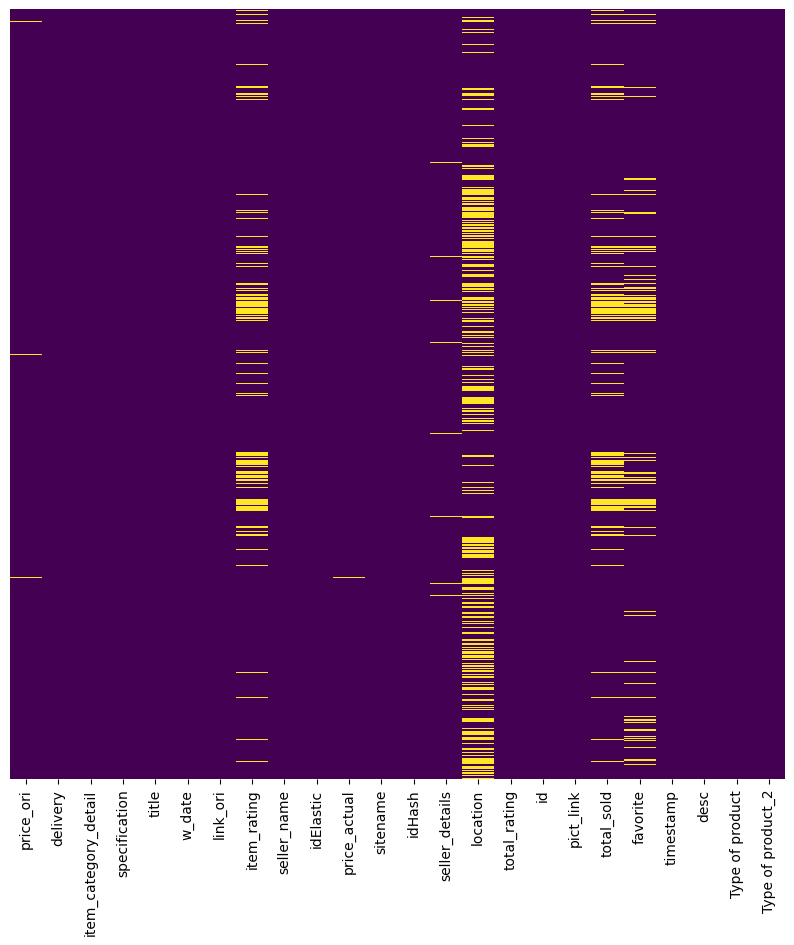

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(new_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')
grouped = new_set[['price_ori', 'delivery', 'item_category_detail', 'specification',
       'title', 'w_date', 'link_ori', 'item_rating', 'seller_name',
       'idElastic', 'price_actual', 'sitename', 'idHash', 'seller_details',
       'location', 'total_rating', 'total_sold', 'Type of product']].groupby('Type of product').agg('sum').reset_index()
grouped.head()

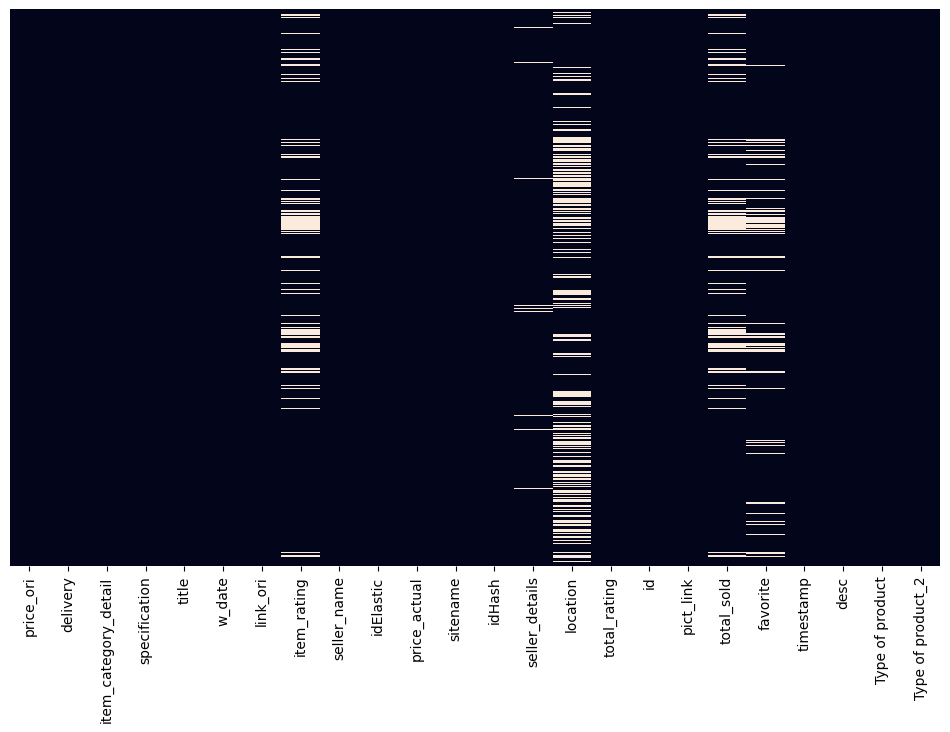

In [24]:
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns

# Ensure loc is initialized
loc = 0  

def on_click(event=None):
    global loc
    loc = (loc + 1) % 4
    ax.cla()

    if loc == 0:
        sns.heatmap(new_set.isnull(), cbar=False, yticklabels=False, ax=ax)
    if loc == 1:
        grouped = new_set.groupby('Type of product').agg('sum').reset_index()
        sns.histplot(data=grouped, x='Type of product', y='total_sold', ax=ax)
    if loc == 2:
        sns.boxplot(data=new_set[(new_set['price_actual']<100) ], x='item_rating', y='price_actual', ax=ax)
    if loc==3:
        sns.boxplot(data=new_set[(new_set['price_actual']>100) & (new_set['price_actual']<1000) ], x='item_rating', y='price_actual', ax=ax)
    canvas.draw()


# Initialize the Tkinter window
app_test_null = tk.Tk()
app_test_null.title("Missing Data")

# Create Matplotlib figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
button = tk.Button(app_test_null, text="Next Plot", command=on_click)
button.pack()
# Create the canvas to embed the Matplotlib figure
canvas = FigureCanvasTkAgg(fig, master=app_test_null)
canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
# Initial plot (Seaborn heatmap)
sns.heatmap(new_set.isnull(), cbar=False, yticklabels=False, ax=ax)
canvas.draw()



# Start the Tkinter event loop
app_test_null.mainloop()


<Axes: xlabel='Type of product', ylabel='price_ori'>

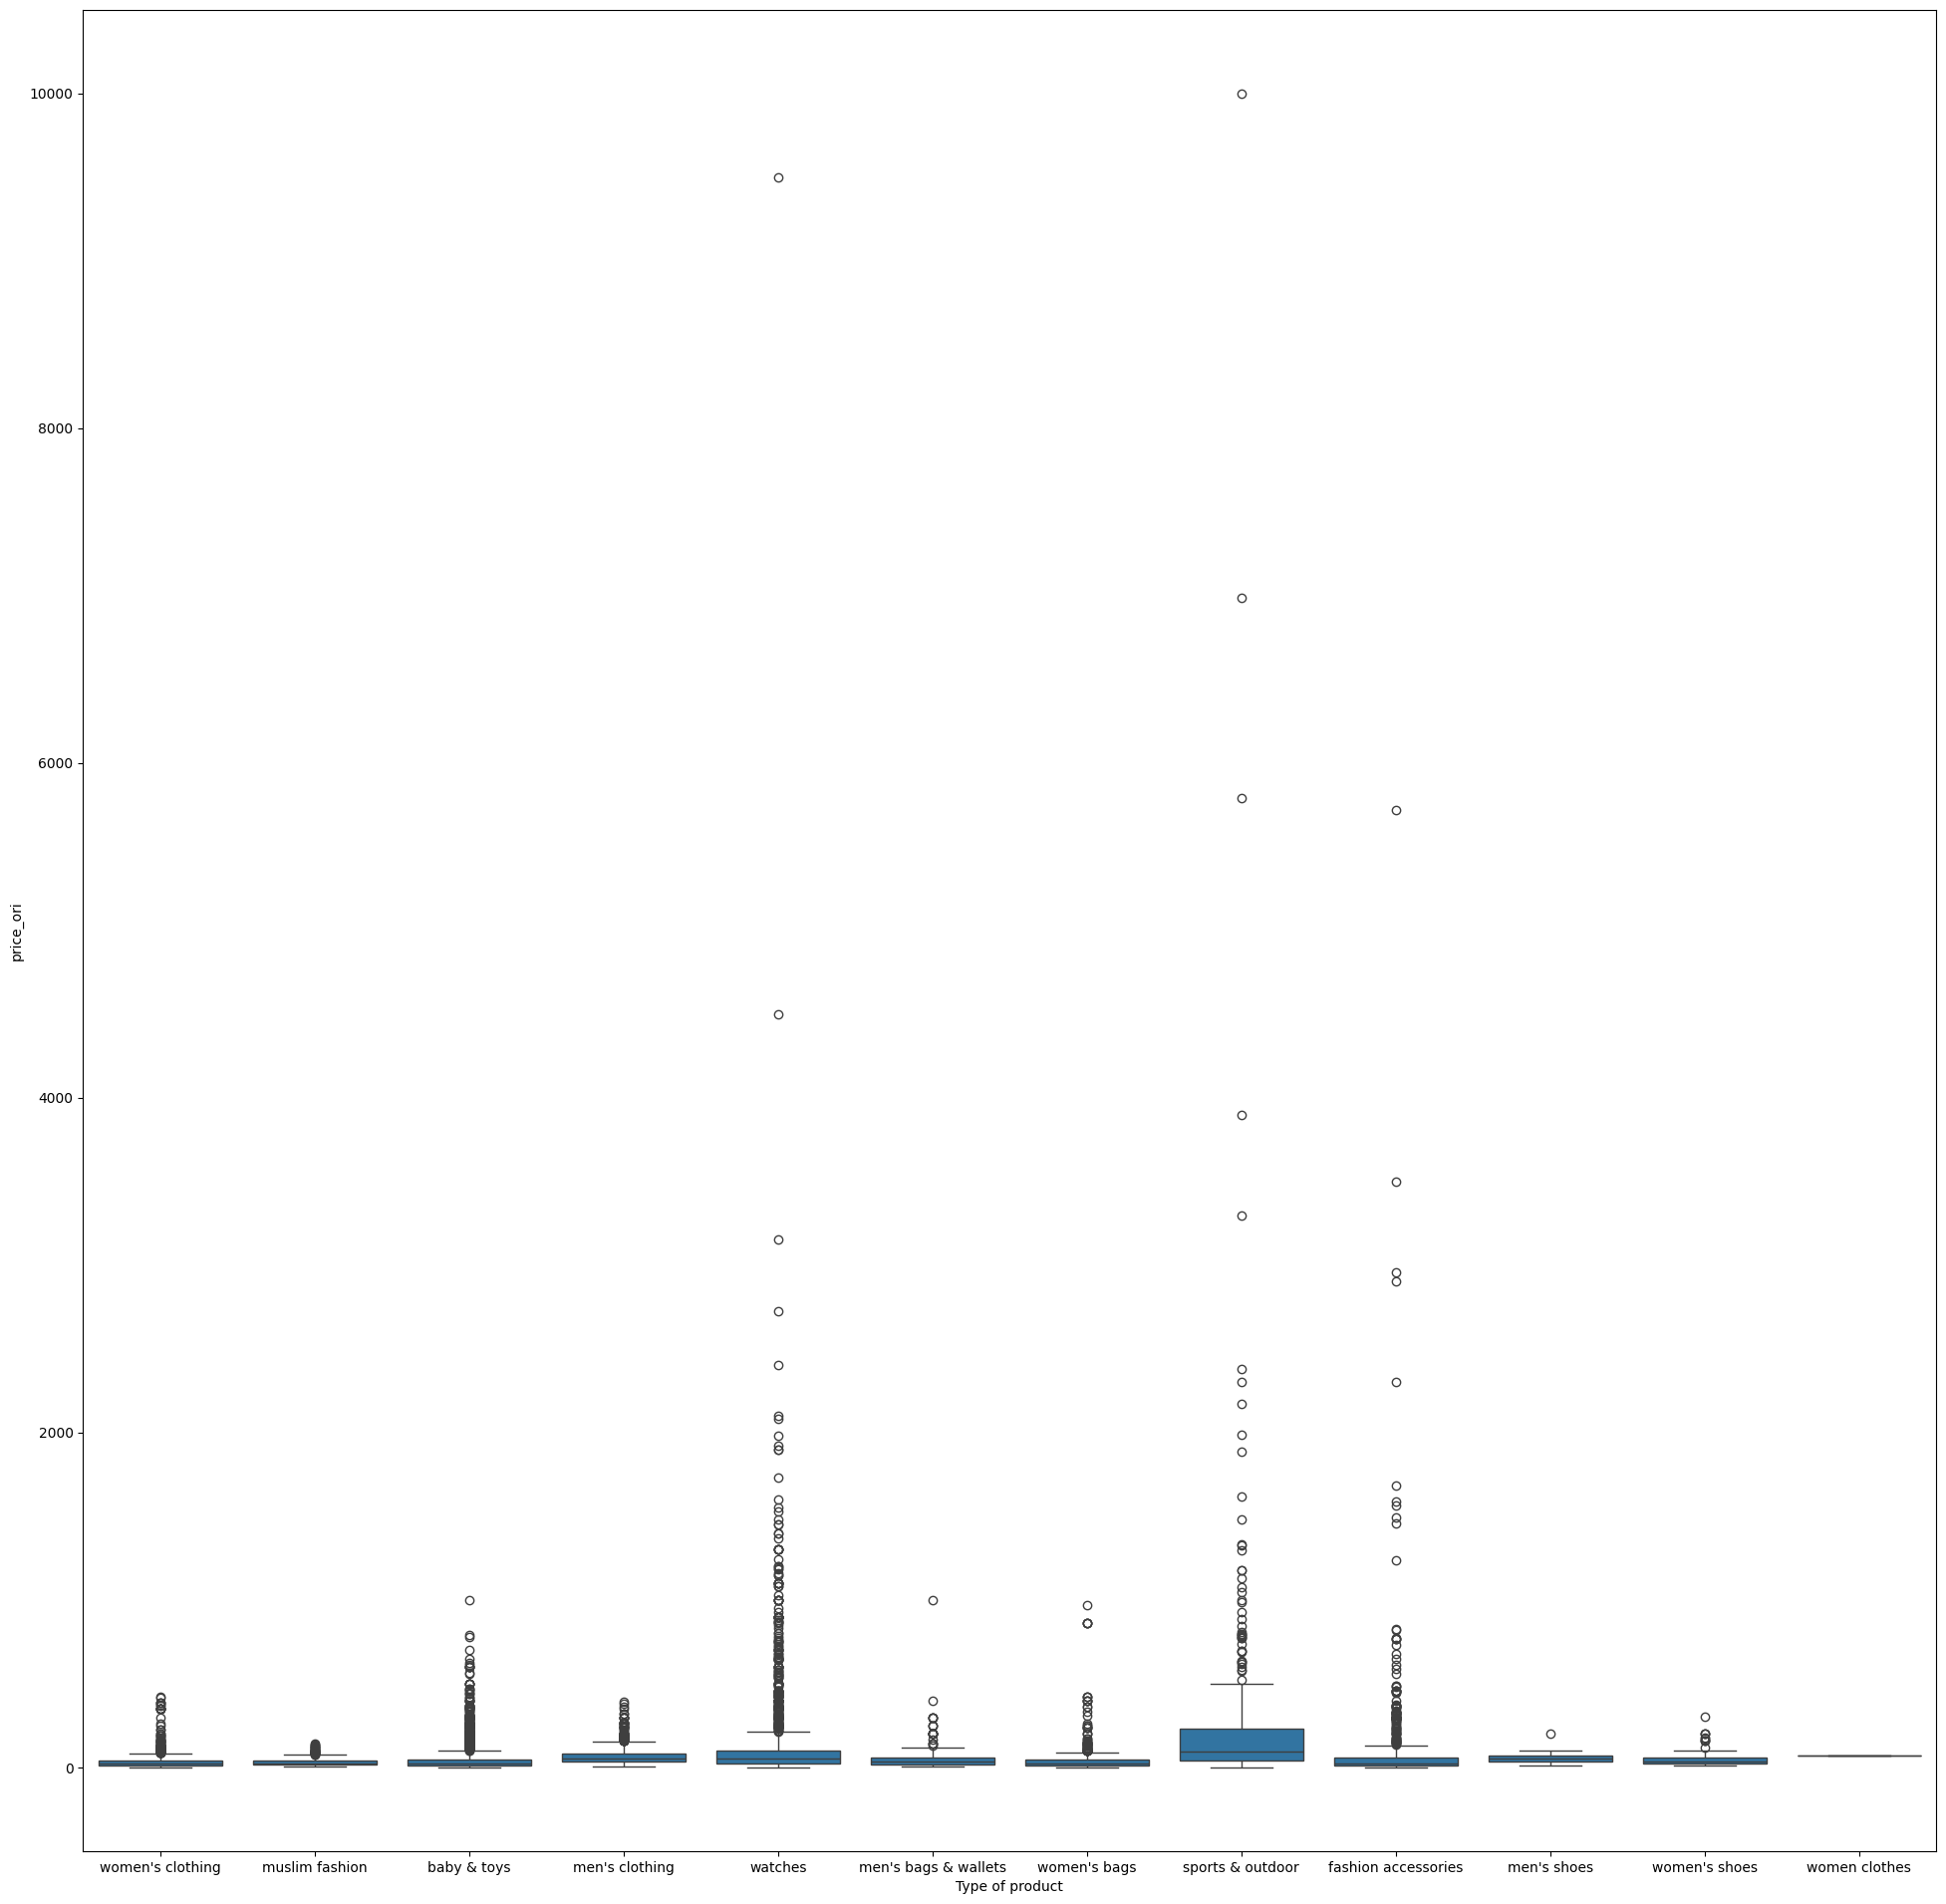

In [25]:
plt.figure(figsize=(24,24))
sns.boxplot(x='Type of product',y='price_ori',data=new_set.dropna(inplace=False))


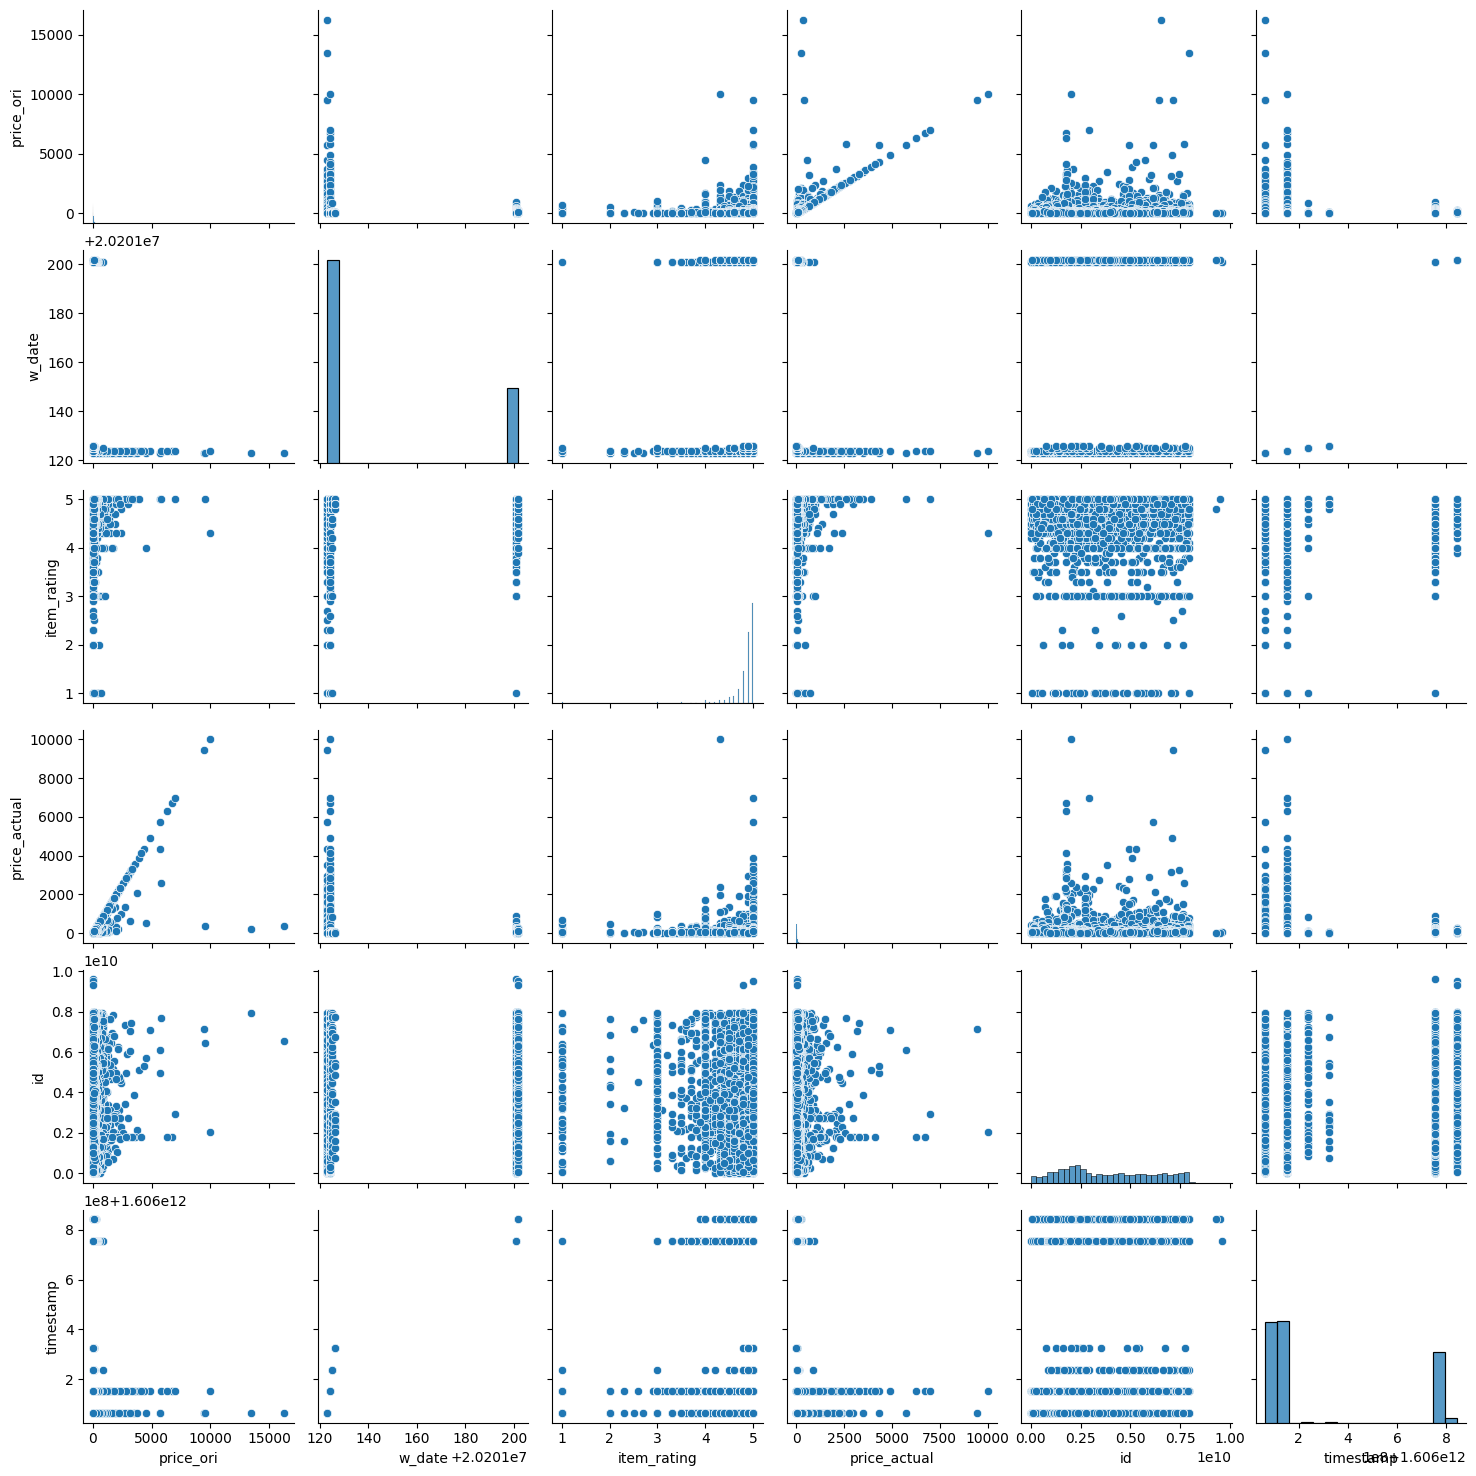

In [26]:
sns.pairplot(data=new_set)

<Axes: xlabel='Type of product', ylabel='item_rating'>

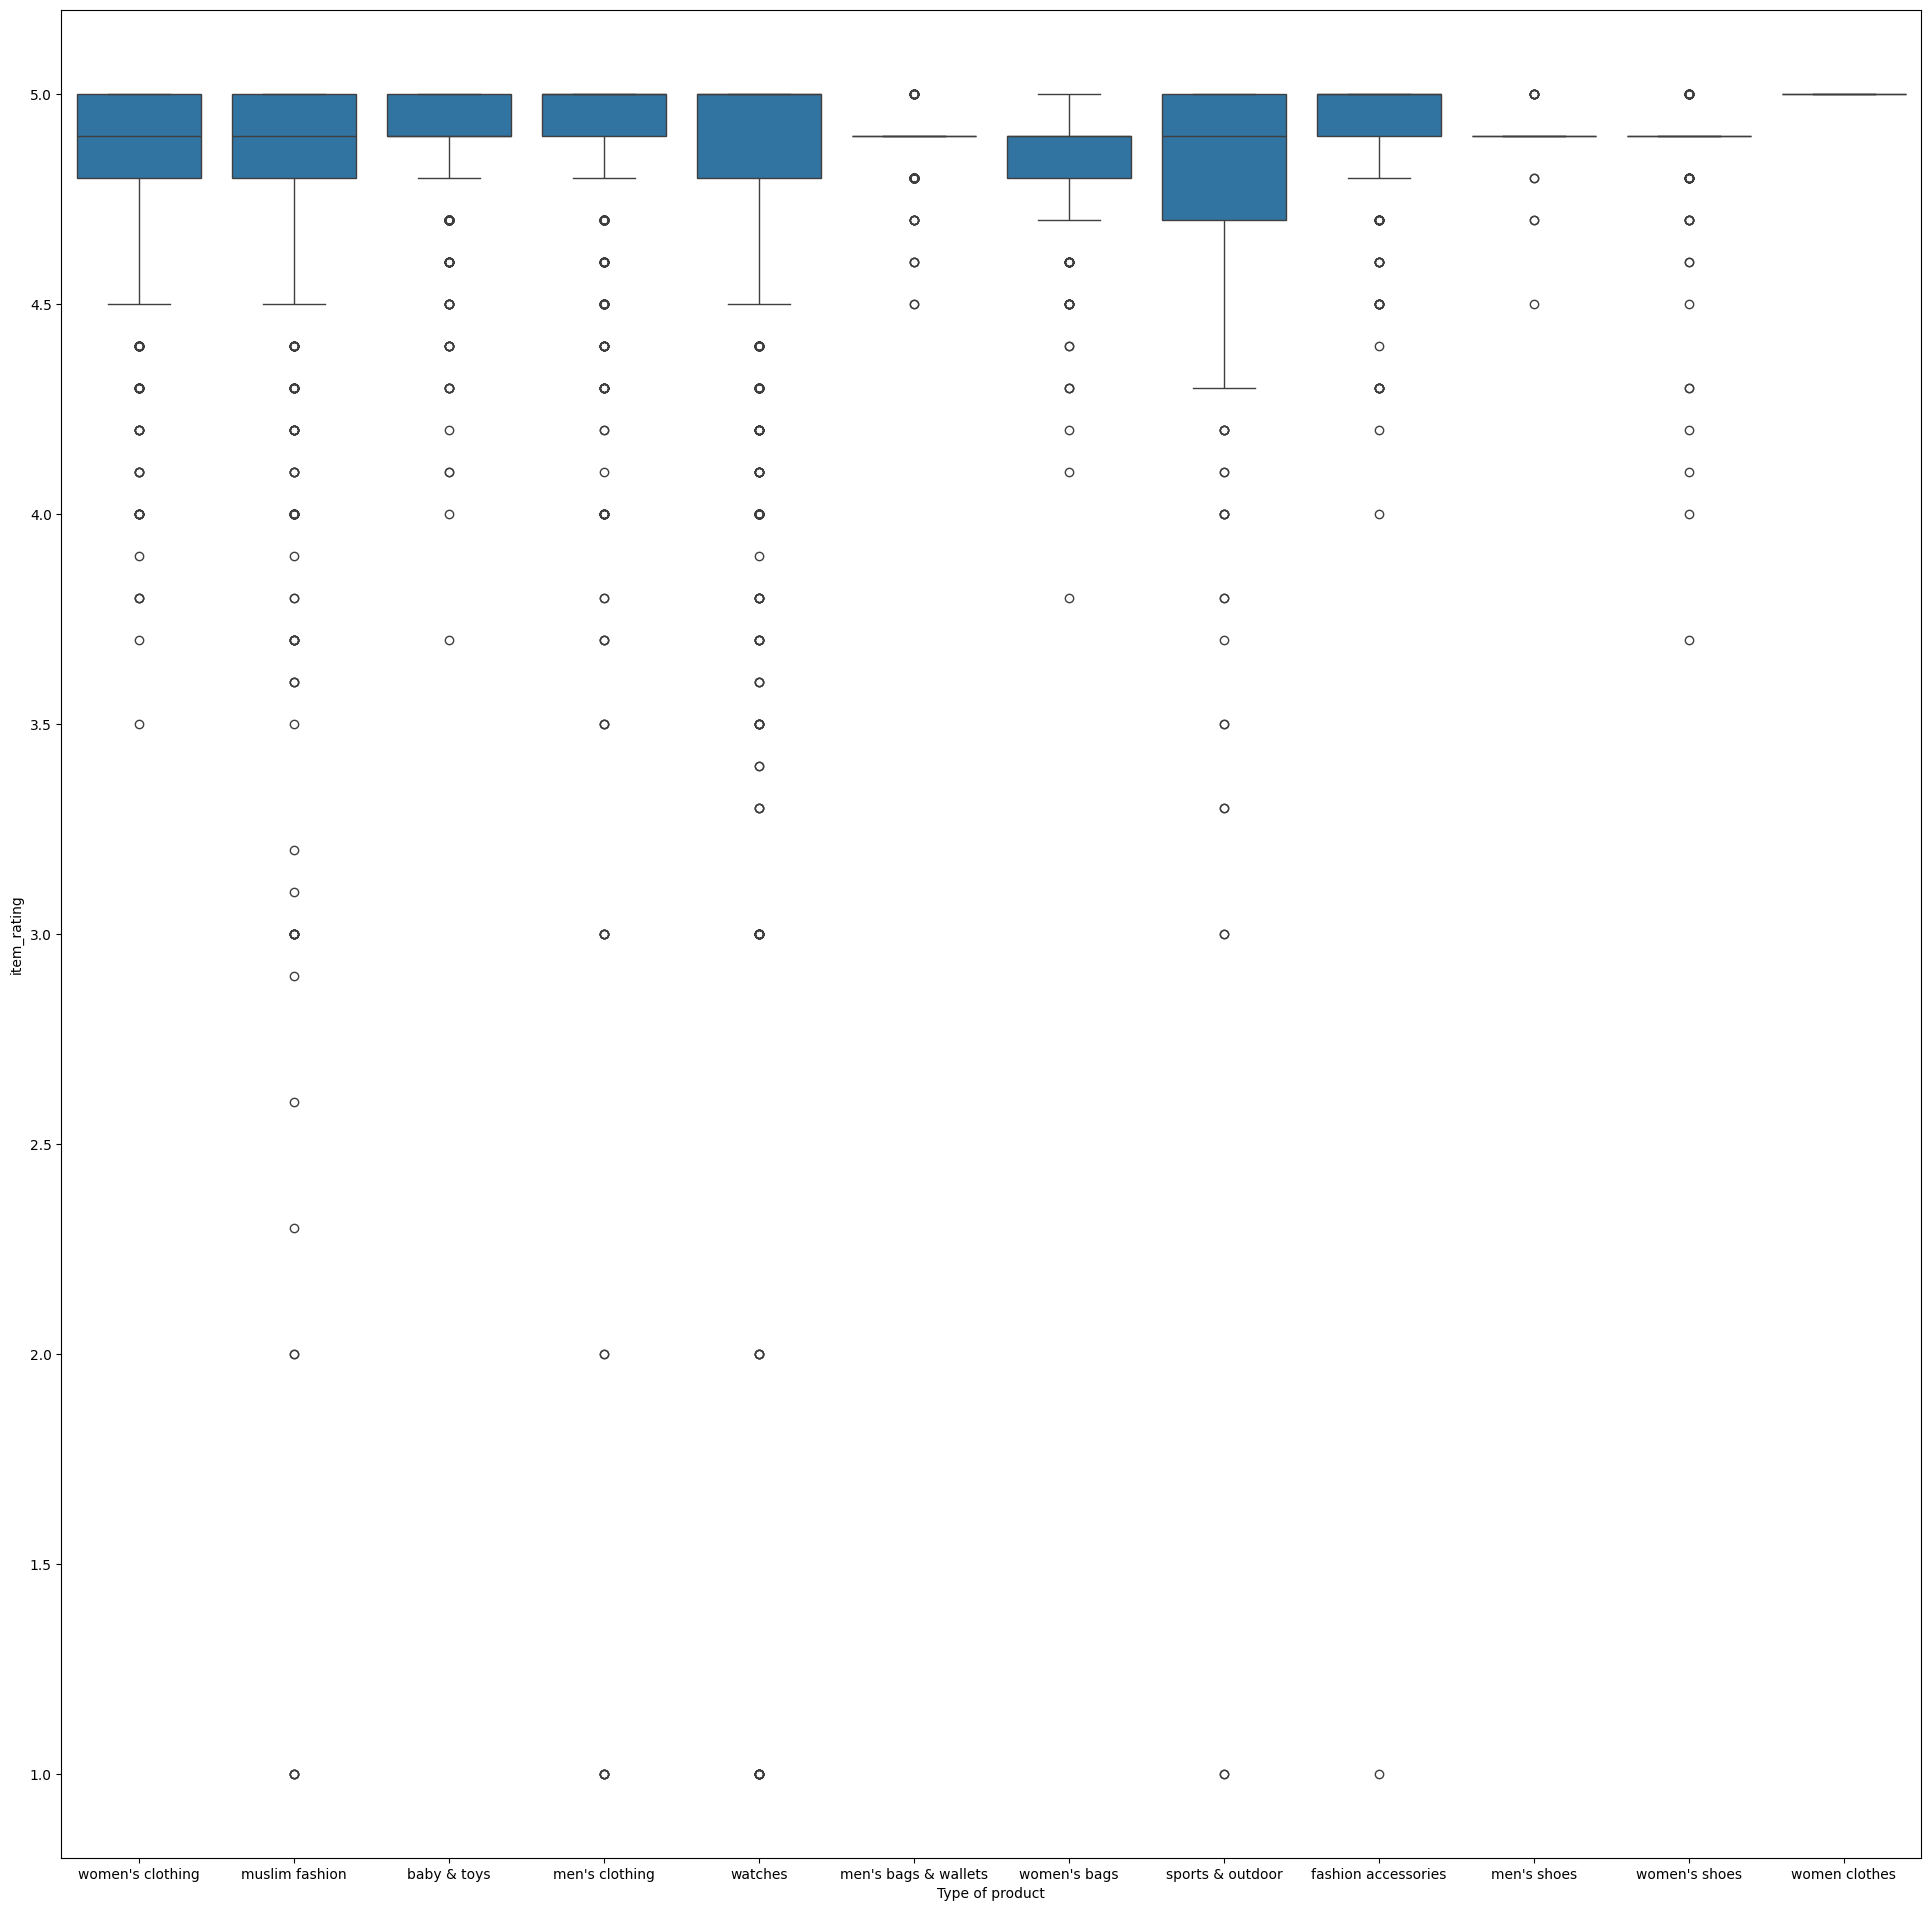

In [27]:
plt.figure(figsize=(24,24))
sns.boxplot(x='Type of product',y='item_rating',data=new_set.dropna(inplace=False))

<Axes: xlabel='item_rating', ylabel='count'>

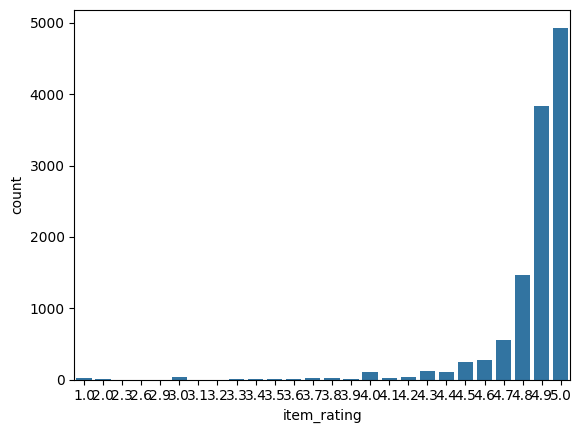

In [28]:
sns.countplot(data=new_set.dropna(inplace=False),x='item_rating')

In [29]:
import plotly.express as px

px.histogram(new_set, x='item_rating', color='Type of product', barmode='overlay')



In [30]:
px.histogram(
    data_frame=new_set,
    x='price_actual'
    )